# Insurance Data Predictive Modeling
  ####  - Vivek Gulavani
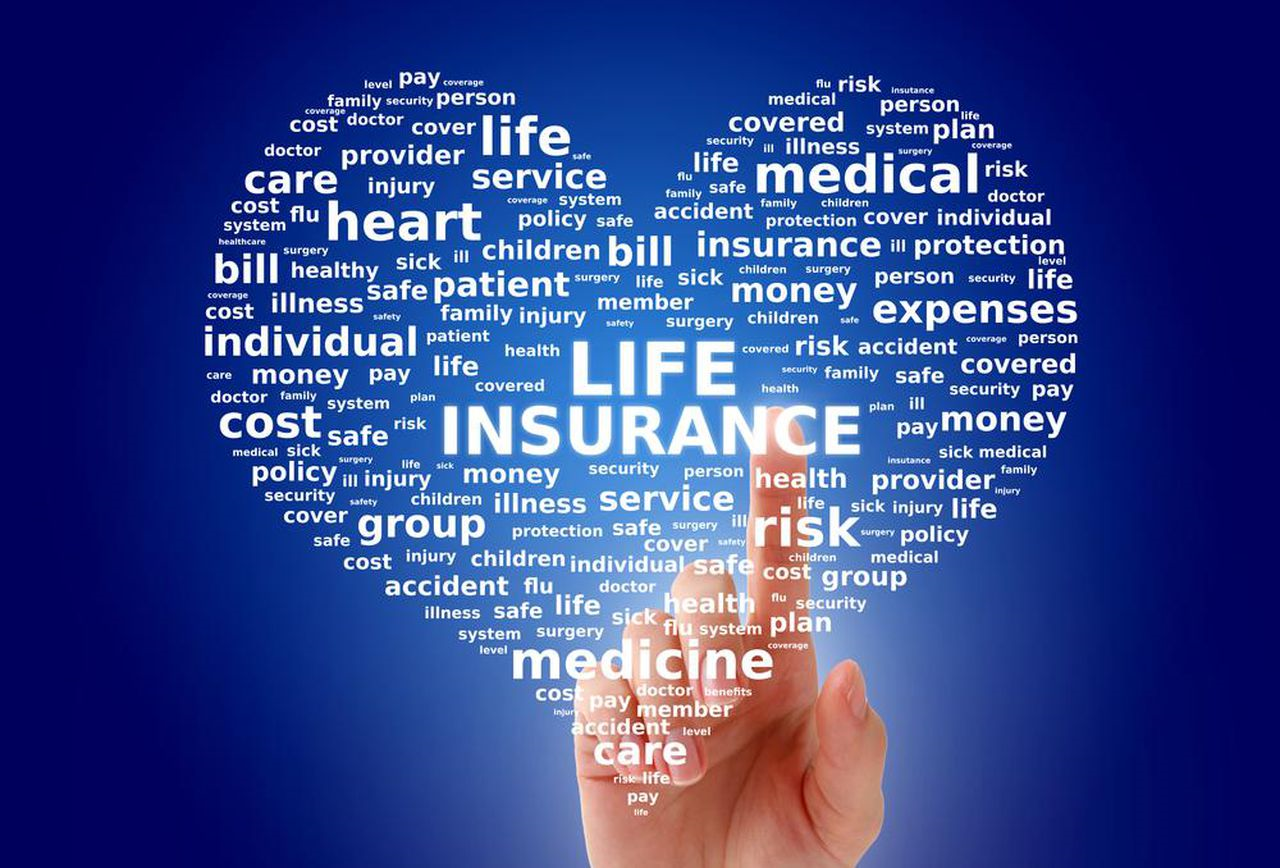


## Table of Content
1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
   - 2.1 [Libraries Loading](#section201)<br>
   - 2.2 [Dataset Loading](#section202)<br>
3. [Data Preprocessing](#section3)<br>
   - 3.1 [Data Cleaning & Transformation](#section301)<br>
     -  3.1.1 [Drop Features with High Percentage of Missing Values](#section311)<br>
     -  3.1.2 [Categorical to Numerical Transformation](#section312)<br>
     -  3.1.3 [Outliers Removal](#section313)<br>
     -  3.1.4 [Impute Missing Values](#section314)<br>
   - 3.2 [Descriptive Statistics](#section302)<br>
   - 3.3 [Top Corelated Features with 'Response'](#section303)<br>
   - 3.4 [X & Y Preparation](#section304)<br>
4. [Train-Test Data Split](#section4)<br>
5. [Generic Model Fit, Prediction & Evaluation Function](#section5)<br>
6. [Decision Tree](#section6)<br>
7. [Random Forest](#section7)<br>
8. [Model Accuracy Improvement](#section8)<br>
   - 8.1 [Decision Tree with Grid Search CV](#section801)<br>
   - 8.2 [Random Forest With Randomized Search](#section802)<br>
9. [Regression Modelling Approach](#section9)<br>
   - 9.1 [Dimensionality Reduction](#section901)<br>
   - 9.2 [Linear Regression](#section902)<br>
   - 9.3 [Decision Tree Regressor](#section903)<br>
   - 9.4 [Random Forest Regressor](#section904)<br>
10. [Model Comparison and Finalization](#section10)<br>


<a id=section1></a>

## 1. Problem Statement

The dataset consists of the characteristics of life insurance applicants.

The task is to build a predictive machine learning model to classify the Risk for the insurance applicant. 

The model needs to automate the insurance process in such a way that the decision regaring the insurance and associated premium can be taken based on model prediction for a new applicant.

The prediction target variable is 'Response Variable' which is Ordinal measure of risk that has 8 levels.

In order to acomplish the predictive model so as to predict the measure of risk(Response) following needs to be done:
1. Analyse and Transform the input data regarding the life insurance applicants.
2. Build and Analyse which machine learning algorithm suits the dataset.
3. Evaluate and finalize the predictive model so that it can be used for prediction of measure of risk.

Providing insurance involves gathering huge amount of data and results in a lenghty process to provide the insuranc policy approval to the customer.

The purpose of building the Maching Learning Model is to automate the insurance risk prediction process so as to provide faster approval of insurance application.

#### Type of Machine Learning Problem:
 - The target variable is an Ordnial Categorical variable with values starting from 1 to 8.
 - 1 Being highest risk and 8 being lowest risk level.
 - Typically this problem could be considered as multi level classification problem and can be solved using classification algorithms.
 - The problem can be also solved by using regression methods as this type of problem comes in between standard classfication and regression problems.
 - Attempted to build models based on multi-level calssification as well as Regression Techniques


<a id=section2></a>

## 2. Data Loading & Description 

<a id=section201></a>

##### Data Description
- Id : A unique identifier associated with an application.
- Product_Info_1-7:    A set of normalized variables relating to the product applied for.
- Ins_Age:             Normalized age of applicant
- Ht:			         Normalized height of applicant
- Wt			         Normalized weight of applicant
- BMI			         Normalized BMI of applicant
- Employment_Info_1-6: A set of normalized variables relating to the employment history of the applicant.
- InsuredInfo_1-6:	 A set of normalized variables providing information about the applicant.
- Insurance_History_1-9:	A set of normalized variables relating to the insurance history of theapplicant.
- Family_Hist_1-5:	A set of normalized variables relating to the family history of the applicant.
- Medical_History_1-41: A set of normalized variables relating to the medical history of the applicant.
- Medical_Keyword_1-48: A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
- Response: This is the target variable, an ordinal variable relating to the final 			decision associated with an application


The following variables are all categorical (nominal):

Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41


- The following variables are continuous:

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5


- The following variables are discrete:

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

- Medical_Keyword_1-48 are dummy variables.

### 2.1 Libraries Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

# allow plots to appear directly in the notebook
%matplotlib inline

<a id=section202></a>

### 2.2 Dataset Loading

In [2]:
insdata = pd.read_csv('insurance_data.csv')
insdata.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


<a id=section3></a>

## 3. Data Preprocessing

In [3]:
insdata.shape

(59381, 128)

In [4]:
insdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [5]:
insdata.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [ ]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(insdata)
profile.to_file("insdatapreprofile.html")   

<a id=section301></a>

### 3.1 Data Cleaning & Transformation

<a id=section311></a>

#### 3.1.1 Drop Features with High Percentage of Missing Values

In [6]:
pctmissing = insdata.isnull().sum()/len(insdata)
missingfeatures = pctmissing[pctmissing > 0.7]

print('Features which has more than 70% data missing:\n',missingfeatures)

Features which has more than 70% data missing:
 Family_Hist_5         0.704114
Medical_History_10    0.990620
Medical_History_15    0.751015
Medical_History_24    0.935990
Medical_History_32    0.981358
dtype: float64


##### Drop Features which have more than 70% missing data

In [7]:
# Drop features with more than 70% missing data as 
# it won't be useful to use them for prediction
mfeatures = missingfeatures.index
insdata.drop(mfeatures,axis=1,inplace=True)

In [8]:
insdata.shape

(59381, 123)

In [9]:
# Check for duplicates
insdata.duplicated().sum()

0

No duplicates found so we are good here.

<a id=section312></a>

#### 3.1.2 Categorical to Numerical Transformation

In [10]:
# Find the non-numeric data types in the dataset
insdata.select_dtypes(exclude=['int64','float64']).columns

Index(['Product_Info_2'], dtype='object')

Product_Info_2 is only non-numeric column in the dataframe.
Let's convert the same into numeric.

In [11]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
insdata.Product_Info_2 = lencoder.fit_transform(insdata.Product_Info_2)

<a id=section313></a>

#### 3.1.3 Outliers Removal

In [12]:
# Traverse through the dataframe and remove the outliers
# As all the columns are numeric now we can remove the outliers using the common 1.5IQR rule
for col in insdata:
    q1 = insdata[col].quantile(0.25)
    q3 = insdata[col].quantile(0.75)
    IQR = q3 - q1
    cutoff = IQR * 1.5
    lower,upper = q1 - cutoff, q3 + cutoff
    insout = insdata[(insdata[col] >= lower)&(insdata[col] <= upper)]

In [13]:
insout.shape

(59381, 123)

As we can see from shape of insout is same as insdata, it looks like that the data is very much normalized and no outliers were removed.
So we continue to use insdata dataframe for further processing.

<a id=section314></a>

#### 3.1.4 Impute Missing Values

##### Impute missing values for remaining features

In [14]:
# Missing Values imputation
pctmissing = insdata.isnull().sum()/len(insdata)
missingfeatures = pctmissing[pctmissing > 0]
missingfeatures

Employment_Info_1      0.000320
Employment_Info_4      0.114161
Employment_Info_6      0.182786
Insurance_History_5    0.427679
Family_Hist_2          0.482579
Family_Hist_3          0.576632
Family_Hist_4          0.323066
Medical_History_1      0.149694
dtype: float64

In [15]:
# All the columns with missing values are numeric, let's impute their values with mean
# As Outliers are removed we can use mean for imputation
insdata = insdata.fillna(insdata.mean())

In [16]:
#Check if missing values have been filled
pctmissing = insdata.isnull().sum()/len(insdata)
missingfeatures = pctmissing[pctmissing > 0]
missingfeatures

Series([], dtype: float64)

The missing values have been filled now as indicated above.

<a id=section302></a>

### 3.2 Descriptive Statistics

#####  Response Class Distribution

Check if the Target Variable (Response class) distribution in the dataset is balanced or unbalanced

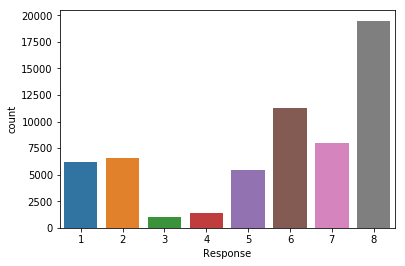

In [17]:
sns.countplot(x=insdata.Response)

- Risk Class 8 has the most data whereas class 3 has least data in the dataset.
- Risk Class 8 contributes to almost 70% of the overall data.
- The distribution indicates that it is an unbalanced data.
- Risk Class 3 has least records followed by class4.

#####  BMI, Ht, Wt,Age Variable Analysis

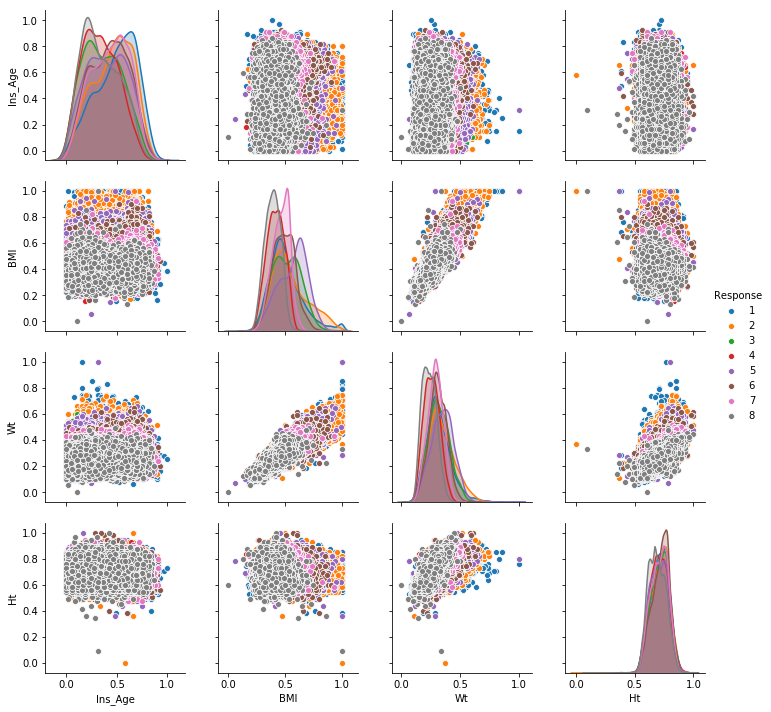

In [18]:
sns.pairplot(insdata[['Ins_Age','BMI','Wt','Ht','Response']],vars=['Ins_Age','BMI','Wt','Ht'],hue='Response')

- Ht,Wt and BMI are strongly corelated to each other.
- Response categories 1,2 are mostly found at higher values of Wt,BMI, Ins_Age. 

<a id=section303></a>

### 3.3 Top Corelated Features with 'Response'

In [19]:
# With huge number of features it is difficult to visualize heatmap. 
#Let's see which indepedent variables impact the Target most
corr = insdata.corr().abs()
display(corr.Response.sort_values(ascending=False))

Response               1.000000
BMI                    0.381601
Wt                     0.351395
Medical_History_23     0.286584
Medical_Keyword_15     0.259169
Medical_Keyword_3      0.257706
Medical_History_4      0.239896
Medical_History_39     0.220176
Ins_Age                0.209610
Product_Info_4         0.202434
Medical_Keyword_48     0.159557
Medical_History_6      0.159230
Medical_History_16     0.137542
Medical_History_13     0.134863
Medical_History_40     0.131519
InsuredInfo_6          0.130476
Insurance_History_2    0.122196
Employment_Info_3      0.116408
Medical_History_30     0.114870
Medical_Keyword_23     0.113580
Medical_History_33     0.113112
Medical_Keyword_25     0.102023
InsuredInfo_5          0.096259
Medical_History_1      0.095872
InsuredInfo_7          0.093927
Medical_Keyword_42     0.093673
Ht                     0.093576
Medical_Keyword_38     0.093377
Medical_History_28     0.092884
Medical_History_18     0.090824
                         ...   
Medical_

##### Top 10 Corelated Features with Target Variable 'Response':
- BMI   :                                         0.381601
- Wt    :                       0.351395
- Medical_History_23:     0.286584
- Medical_Keyword_15 :    0.259169
- Medical_Keyword_3   :   0.257706
- Medical_History_4    :  0.239896
- Medical_History_39    : 0.220176
- Ins_Age                : 0.209610
- Product_Info_4         : 0.202434
- Medical_Keyword_48     : 0.159557

##### Remove independent variables with multi-colinearity

In [20]:
# Create correlation matrix without including target variable so as to remove multicolinearity between independent variables
temp = insdata.loc[insdata.columns != 'Response']
corr = temp.corr().abs()

# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
insdata.drop(to_drop,axis=1,inplace=True)
insdata.shape

(59381, 114)

In [21]:
# Drop Product_Id column as it is unique identifier and should not have contribution towards Risk
insdata.drop('Id',axis=1,inplace=True)

In [25]:
insdata.shape

(59381, 113)

<a id=section304></a>

#### 3.4 X & Y Preparation

In [22]:
X = insdata.loc[:,insdata.columns != 'Response']
X.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47
0,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y = insdata.Response
y.head()

0    8
1    4
2    8
3    8
4    8
Name: Response, dtype: int64

<a id=section4></a>

## 4. Train-Test Data Split

In [24]:
def split(X,y,test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=1)

In [25]:
X_train, X_test, y_train, y_test = split(X,y,test_size=0.25)

#### Check the shape of X an y of train dataset.

In [26]:
def log():
    print(X_train.shape)
    print(y_train.shape)
log()

(44535, 112)
(44535,)


#### Check the shape of X an y of test dataset.

In [27]:
def log():
    print(X_test.shape)
    print(y_test.shape)
log()

(14846, 112)
(14846,)


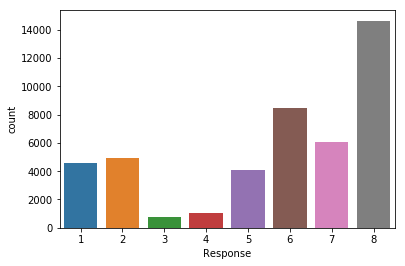

In [28]:
# Check the spread of target variable 'Response' in y_train
sns.countplot(x=y_train)

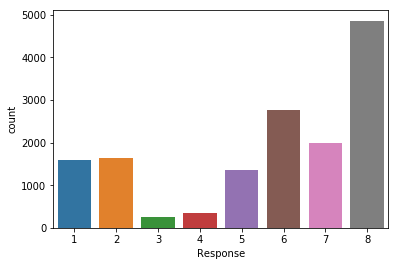

In [29]:
# Check spread of y_test
sns.countplot(x=y_test)

<a id=section5></a>

# 5 Generic Model Fit, Prediction & Evaluation Function

Write a generic function which can be used across the models to the following as we need to these things for every model:
- Fit the train data into model
- Predict the test data
- Display all the evaluation Metrics

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import classification_report

#Generic funtion to fit, predict and evaluate the model
def FitpredictEvaluateModel(model,X_train, y_train,X_test=X_test,y_test=y_test):
    
    model.fit(X_train,y_train)
    
    # Print the Accuracy of the model
    y_pred_test = model.predict(X_test)
    print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
    print('\n')
    
    # Print Confusion Matrix
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
    cm.index = ['A1','A2','A3','A4','A5','A6','A7','A8']
    cm.columns = ['P1','P2','P3','P4','P5','P6','P7','P8']
    print('Confusion Matrix is:')
    print(cm)
    print('\n')
    
    # Display Normalized Confusion Matrix
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
    
    # Display Classification Report
    print('Classification Report for the Model is:')
    print(classification_report(y_test,y_pred_test))

<a id=section6></a>

## 6. Decision Tree

Create Decision Tree wihout hyperparameter tuning

In [142]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier(random_state = 1)

Accuracy score for test data is: 0.40515963895998924


Confusion Matrix is:
     P1   P2  P3  P4   P5   P6   P7    P8
A1  338  286  31  35  181  291  189   251
A2  297  381  37  35  213  297  159   217
A3   24   31  26  21   61   62   15    20
A4   32   28  10  51    5   94   45    94
A5  160  225  60  12  513  222   78    91
A6  308  305  56  85  222  950  393   452
A7  167  165  23  32   86  385  636   502
A8  286  232  25  94   92  494  518  3120


Classification Report for the Model is:
              precision    recall  f1-score   support

           1       0.21      0.21      0.21      1602
           2       0.23      0.23      0.23      1636
           3       0.10      0.10      0.10       260
           4       0.14      0.14      0.14       359
           5       0.37      0.38      0.38      1361
           6       0.34      0.34      0.34      2771
           7       0.31      0.32      0.32      1996
           8       0.66      0.64      0.65      4861

    accuracy    

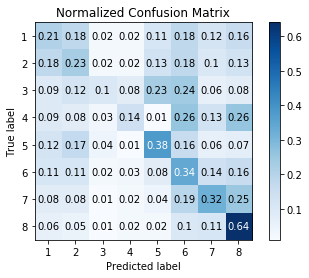

In [143]:
# Predict and Evaluate the Model
FitpredictEvaluateModel(dt1,X_train, y_train)

<a id=section7></a>

## 7. Random Forest

### Model Creation

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf1 = RandomForestClassifier(random_state = 1,n_jobs=-1)

C:\Users\vgulavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score for test data is: 0.47851273070187256


Confusion Matrix is:
     P1   P2  P3  P4   P5    P6   P7    P8
A1  378  310   3  14  133   315  159   290
A2  271  386   3  11  192   358  143   272
A3   25   31  16   9   52    78   12    37
A4   27   18   0  25    5   123   30   131
A5  142  185  19   5  600   235   67   108
A6  255  240  11  35  168  1177  322   563
A7  125   78   7   9   50   507  591   629
A8   98   66   1  39   34   434  258  3931


Classification Report for the Model is:
              precision    recall  f1-score   support

           1       0.29      0.24      0.26      1602
           2       0.29      0.24      0.26      1636
           3       0.27      0.06      0.10       260
           4       0.17      0.07      0.10       359
           5       0.49      0.44      0.46      1361
           6       0.36      0.42      0.39      2771
           7       0.37      0.30      0.33      1996
           8       0.66      0.81      0.73      4861

    acc

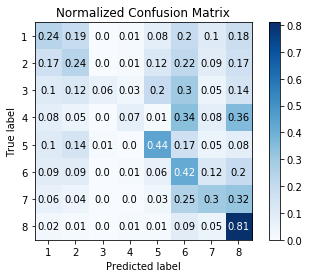

In [146]:
# Predict and Evaluate the Model
FitpredictEvaluateModel(rf1,X_train, y_train)

<a id=section8></a>

## 8. Model Accuracy Improvement

<a id=section801></a>

### 8.1 Decision Tree with Grid Search CV

In [152]:
# Multiple combinations of the parameters have been tried. Kept the parameters providing best results.
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

dt_classifier = tree.DecisionTreeClassifier(random_state = 1)

tree_para = [{'criterion':['gini'],
              'max_depth': [8], 
              "min_samples_split":[2],
              "min_samples_leaf": [2],
              'max_features': [None] }] # sqrt, log2 were reducing the accuracy so have kept only None here
dt2 = GridSearchCV(dt_classifier,tree_para, cv=10, scoring='accuracy') 

Accuracy score for test data is: 0.5184561498046611


Confusion Matrix is:
     P1   P2  P3  P4   P5    P6   P7    P8
A1  168  194   5   8  150   442  221   414
A2  129  328   1   9  191   418  177   383
A3    7    7  10  10   67   128    3    28
A4    5    1   0  29    2   184    9   129
A5   47  105  14   4  653   340   64   134
A6   64   81   0  22   81  1484  372   667
A7   20   18   0   4    5   452  749   748
A8   10   19   0  24   10   371  151  4276


Classification Report for the Model is:
              precision    recall  f1-score   support

           1       0.37      0.10      0.16      1602
           2       0.44      0.20      0.27      1636
           3       0.33      0.04      0.07       260
           4       0.26      0.08      0.12       359
           5       0.56      0.48      0.52      1361
           6       0.39      0.54      0.45      2771
           7       0.43      0.38      0.40      1996
           8       0.63      0.88      0.73      4861

    accu

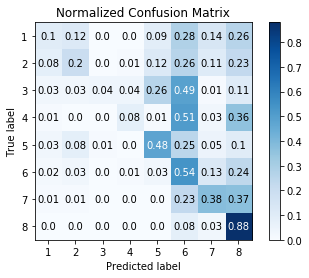

In [153]:
# Predict and Evaluate the Model
FitpredictEvaluateModel(dt2,X_train, y_train)

In [154]:
dt2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

<a id=section802></a>

### 8.2 Random Forest With Randomized Search CV

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for RandomizedSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [9],
              "min_samples_split":[11],
              "min_samples_leaf": [2],
              "bootstrap": [True, False],
              "n_estimators": [15],
              "criterion" : ["gini"],
              'max_features': [None],
             }
# run randomized search
n_iter_search = 5
rf2 = RandomizedSearchCV(rf1, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   cv=5,
                                   n_jobs = -1)

C:\Users\vgulavan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Accuracy score for test data is: 0.524316314158696


Confusion Matrix is:
     P1   P2  P3  P4   P5    P6   P7    P8
A1  194  219   5   5  158   383  237   401
A2  119  343   5   8  201   396  187   377
A3    6    6  10   9   76   116    6    31
A4    3    0   0  22    2   181   18   133
A5   35  121   8   3  709   287   68   130
A6   81   87   0  19   88  1484  374   638
A7   32    8   0   3    5   433  771   744
A8   13    9   0  20   11   402  155  4251


Classification Report for the Model is:
              precision    recall  f1-score   support

           1       0.40      0.12      0.19      1602
           2       0.43      0.21      0.28      1636
           3       0.36      0.04      0.07       260
           4       0.25      0.06      0.10       359
           5       0.57      0.52      0.54      1361
           6       0.40      0.54      0.46      2771
           7       0.42      0.39      0.40      1996
           8       0.63      0.87      0.74      4861

    accur

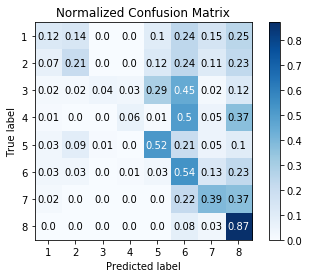

In [187]:
# Predict and Evaluate the Model
FitpredictEvaluateModel(rf2,X_train, y_train)

In [188]:
rf2.best_params_

{'n_estimators': 15,
 'min_samples_split': 11,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': True}

Overall it can be seen that all the tried models the confusion matrix clearly indicates that prediction for class 5,6,7,8 is better than classes 1,2,3 and 4.

This is clear indication of issue because of data imbalance particularly visible TP rate for class-8 which has maximum records present in the dataset.

We will need to find out a way to solve the data imbalance problem to improve the model performance.

<a id=section9></a>

## 9 Regrssion Modelling Approach

<a id=section901></a>

#### 9.1 Dimensionality Reduction

##### Principle Component Analysis

Let's use PCA for Regresion problem.
Attempted PCA for Classification problem but it in fact reduced the accuracy of the classification models

In [30]:
from sklearn.decomposition import PCA

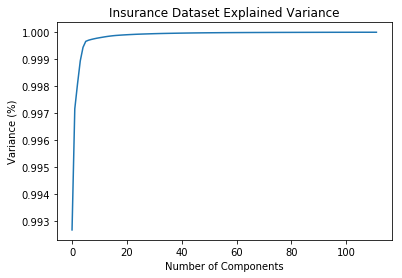

<Figure size 432x288 with 0 Axes>

In [31]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Insurance Dataset Explained Variance')
plt.figure()
plt.show()

As more than 99% of variance is achieved with 20 features let us use 20 features for Regression

In [32]:
pca=PCA(n_components=30)

In [33]:
X_pca = pca.fit_transform(X)

In [34]:
X_pca.shape

(59381, 30)

<a id=section902></a>

### 9.2 Linear Regression

In [96]:
def linear_reg( X_train, X_test,y_train, y_test, gridsearch = False):
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 5,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
    return linreg

In [36]:
# Regression Model Evaluation
def regModeval(X_test,y_test, y_pred_test):
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for test set is {}'.format(MAE_test))
    
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for test set is {}'.format(MSE_test))
    
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for test set is {}'.format(RMSE_test))
    
    SS_Residual = sum((y_test-y_pred_test)**2)
    SS_Total = sum((y_test-np.mean(y_test))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print(r_squared, adjusted_r_squared)

#### Linreg Without Grid Search without PCA

In [104]:
X_train, X_test, y_train, y_test = split(X,y,test_size=0.4)

In [105]:
lregnCV = linear_reg(X_train,X_test,y_train,y_test,False)

In [106]:
y_pred_test= lregnCV.predict(X_test)

In [107]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.559728144459873
MSE for test set is 4.0143480205855635
RMSE for test set is 2.0035837942510826
0.3425979396169364 0.3394833444069998


In [108]:
X_train.shape

(35628, 112)

##### LinReg without PCA with GridSearch

In [109]:
lregCV = linear_reg(X_train,X_test,y_train,y_test,True)

In [110]:
y_pred_test= lregCV.predict(X_test)

In [111]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.5597281444598725
MSE for test set is 4.014348020585563
RMSE for test set is 2.003583794251082
0.3425979396169351 0.33948334440699834


In [141]:
lregCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

##### Linreg wihout Gridsearch with PCA

In [112]:
X_train, X_test, y_train, y_test = split(X_pca,y)

In [113]:
lregnCV = linear_reg(X_train,X_test,y_train,y_test,False)

In [114]:
y_pred_test= lregnCV.predict(X_test)

In [115]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.7563010394949263
MSE for test set is 4.712114818055396
RMSE for test set is 2.1707406151024573
0.2273703486037707 0.22541366368549565


In [116]:
X_train.shape

(47504, 30)

In [117]:
lregCV = linear_reg(X_train,X_test,y_train,y_test,True)

In [118]:
y_pred_test= lregCV.predict(X_test)

In [119]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.7563010394949263
MSE for test set is 4.712114818055396
RMSE for test set is 2.1707406151024573
0.22737034860377014 0.2254136636854951


<a id=section903></a>

### 9.3 Decision Tree Regression

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
dtr = DecisionTreeRegressor(random_state=1)

##### Without PCA

In [149]:
X_train, X_test, y_train, y_test = split(X,y)

In [150]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [151]:
y_pred_test = dtr.predict(X_test)

In [152]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.763239875389408
MSE for test set is 7.440767870674413
RMSE for test set is 2.7277770932894083
-0.22003773422735118 -0.2316531903845649


##### With PCA

In [153]:
X_train, X_test, y_train, y_test = split(X_pca,y)

In [154]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [155]:
y_pred_test = dtr.predict(X_test)

In [156]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 2.1719289382840783
MSE for test set is 9.22909825713564
RMSE for test set is 3.0379430964281804
-0.5132642655033932 -0.5170966078945043


<a id=section904></a>

#### 9.4 Random Forest Regressor

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
rfr = RandomForestRegressor(random_state=1)

##### Witout PCA

In [157]:
X_train, X_test, y_train, y_test = split(X,y)

In [158]:
rfr.fit(X_train, y_train)

C:\Users\vgulavan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [159]:
y_pred_test = rfr.predict(X_test)

In [160]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.532701860739244
MSE for test set is 4.180868064326008
RMSE for test set is 2.0447171110757614
0.3144770957837285 0.30795052614141105


##### With Randomized Search CV Without PCA

In [161]:
from sklearn.model_selection import RandomizedSearchCV

In [186]:
param_dist = {"max_depth": [30],
              "min_samples_split":[9],
              "min_samples_leaf": [3],
              "bootstrap": [True, False],
              "n_estimators": [20],
              "criterion" : ["mse"],
              'max_features': ['sqrt'],
             }
# run randomized search
n_iter_search = 5
rfr2 = RandomizedSearchCV(rfr, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   cv=10,
                                   n_jobs = -1)

In [187]:
rfr2.fit(X_train,y_train)

C:\Users\vgulavan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=1, v

In [191]:
y_pred_test = rfr2.predict(X_test)

In [192]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.5201069267847593
MSE for test set is 3.820077713995826
RMSE for test set is 1.9545019094377538
0.37363467860294475 0.3676713229419051


In [181]:
rfr2.best_params_

{'n_estimators': 20,
 'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'mse',
 'bootstrap': False}

##### With PCA

In [200]:
X_train,X_test,y_train,y_test = split(X_pca,y)

In [206]:
param_dist = {"max_depth": [30],
              "min_samples_split":[9],
              "min_samples_leaf": [3],
              "bootstrap": [True, False],
              "n_estimators": [20],
              "criterion" : ["mse"],
              'max_features': ['sqrt',None,'log2'],
             }
# run randomized search
n_iter_search = 5
rfr3 = RandomizedSearchCV(rfr, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   cv=10,
                                   n_jobs = -1)

In [204]:
y_train.shape

(47504,)

In [207]:
rfr3.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=1, v

In [208]:
y_pred_test = rfr3.predict(X_test)

In [209]:
regModeval(X_test,y_test,y_pred_test)

MAE for test set is 1.758104091954952
MSE for test set is 4.711925156657006
RMSE for test set is 2.170696928789693
0.22740144674670126 0.22544484058448622


<a id=section10></a>

## 10. Model Comparison and Finalization

Classification Model Selected - Random Forest with Randomized Search CV
Regression Model Selected - Random Forest with Radomized Search CV

##### Final Recommendation:
Random Forest Regressor with RandomizedSearchCV to be used for prediction.